# INFO 103: Introduction to data science <br> Demo \#2: Data Files <br> Author: JRW

## Data
Here's a list of the files that we will be working with in this notebook:

* Image: ./Rgb-raster-image_smile.jpg
* Text: ./MobyDick.txt
* Spreadsheet: ./APPL.csv
* html: ./index.html
* json: ./youtube.json
* xml: ./simple.xml

All of the paths start with a './' because they should be in the same directory as this notebook. Also, here are the sources, for reference:

* Image: https://en.wikipedia.org/wiki/Raster_graphics
* Text: http://www.gutenberg.org/ebooks/2701
* Spreadsheet: https://finance.yahoo.com/quote/AAPL/history?p=AAPL
* html: http://www.example.com
* json: https://www.sitepoint.com/10-example-json-files/
* xml: https://www.w3schools.com/xml/xml_examples.asp

### Modules

In [49]:
import numpy as np ## numpy provides a suite of numerical 
import pandas as pd ## pandas provides nice ordered array (spreadsheet) handling 
import re ## re provides regular expressions, which help with text
import json ## json provides json-format data management
import datetime ## datetime interprets dates as numerical quantities
from bs4 import BeautifulSoup ## Beautifulsoup parses html, thus, also xml!
from IPython.core.display import display ## display allows you to show an image here in the notebook
from PIL import Image ## Image allows you to edit image data
from io import BytesIO #input output data

### Spreadsheets
I'm pretty basic when it comes to programming, so I usually just use base Python with for loops and regular expressions, but for convenience we'll use pandas, which is great for manipulating spreadsheets as 2-d arrays. Here are what the parameters we use:

* filepath_or_buffer: specifies the name of the file
* sep: specifies the column separator, here, commmas
* header: specifies where the header is, here, row 1
* parse_dates: specifies columns to be treated as timestamp objects

The resulting pandas object is a "dataframe".

Declare the path of the file. In the below example, the "AAPL.csv" file, this is the file we are trying to load into this notebook. 

In [50]:
file_path = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\APPL.csv'

In [51]:
#pd.read_csv helps 
APPL = pd.read_csv(file_path, sep=",", header=0, parse_dates = [0])
print(APPL.keys())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


You can access the rows with indices:

In [54]:
APPL.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-13,97.410004,97.669998,96.839996,96.870003,25892200,95.442123
1,2016-07-12,97.169998,97.699997,97.120003,97.419998,24167500,95.984011
2,2016-07-11,96.750000,97.650002,96.730003,96.980003,23794900,95.550502
3,2016-07-08,96.489998,96.889999,96.050003,96.680000,28912100,95.254921
4,2016-07-07,95.699997,96.500000,95.620003,95.940002,25139600,94.525831


and the columns by dictionary keys:

In [55]:
APPL.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
4749,1997-08-27,22.375000,22.750000,21.875000,22.6875,47658800,0.734846
4750,1997-08-26,22.625000,23.000001,22.125001,22.2500,56551600,0.720675
4751,1997-08-25,23.625000,23.687500,22.937499,23.0625,34658400,0.746992
4752,1997-08-22,23.437501,24.000000,23.374999,23.6250,56907200,0.765211
4753,1997-08-21,24.500000,24.687499,23.875001,24.0000,64820000,0.777357


In [58]:
#TEA slicing - Refers to obtaining or calling a part of the object
print(APPL["Date"][1:11])

1    2016-07-12
2    2016-07-11
3    2016-07-08
4    2016-07-07
5    2016-07-06
6    2016-07-05
7    2016-07-01
8    2016-06-30
9    2016-06-29
10   2016-06-28
Name: Date, dtype: datetime64[ns]


In [59]:
print(APPL["Date"][4:5453432445])

4      2016-07-07
5      2016-07-06
6      2016-07-05
7      2016-07-01
8      2016-06-30
          ...    
4749   1997-08-27
4750   1997-08-26
4751   1997-08-25
4752   1997-08-22
4753   1997-08-21
Name: Date, Length: 4750, dtype: datetime64[ns]


In [7]:
print(APPL["Low"][4:9])

4    95.620003
5    94.370003
6    94.459999
7    95.330002
8    94.300003
Name: Low, dtype: float64


In [8]:
print(APPL["Low"])

0       96.839996
1       97.120003
2       96.730003
3       96.050003
4       95.620003
          ...    
4749    21.875000
4750    22.125001
4751    22.937499
4752    23.374999
4753    23.875001
Name: Low, Length: 4754, dtype: float64


Notice the "Open" column has floats, while the "Volume" column has ints:

In [60]:
type(APPL["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
print(type(APPL["Open"][0]))
print(type(APPL["Volume"][0]))

<class 'numpy.float64'>
<class 'numpy.int64'>


In [10]:
print(type(APPL['High'][4]))

<class 'numpy.float64'>


In [11]:
APPL["Date"][0]

Timestamp('2016-07-13 00:00:00')

The weird column is Date, which has timestamp objects:

In [12]:
print(type(APPL["Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [61]:
96.870003-97.169998

-0.2999950000000098

In [63]:
APPL.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-13,97.410004,97.669998,96.839996,96.870003,25892200,95.442123
1,2016-07-12,97.169998,97.699997,97.120003,97.419998,24167500,95.984011
2,2016-07-11,96.750000,97.650002,96.730003,96.980003,23794900,95.550502
3,2016-07-08,96.489998,96.889999,96.050003,96.680000,28912100,95.254921
4,2016-07-07,95.699997,96.500000,95.620003,95.940002,25139600,94.525831
5,2016-07-06,94.599998,95.660004,94.370003,95.529999,30949100,94.121870
6,2016-07-05,95.389999,95.400002,94.459999,94.989998,27705200,93.589829
7,2016-07-01,95.489998,96.470001,95.330002,95.889999,26026500,94.476565
8,2016-06-30,94.440002,95.769997,94.300003,95.599998,35836400,94.190838
9,2016-06-29,93.970001,94.550003,93.629997,94.400002,36531000,93.008530


In [62]:
APPL["Close"][0]

96.870003

In [64]:
APPL["Open"][1]

97.169998

In [66]:
## element-wise subtraction
print(APPL["Close"][9] + APPL["Open"][1])

191.57


You can do the usual math with floats and ints:

In [67]:
## element-wise subtraction
print(APPL["Close"][0] - APPL["Open"][1])
print("")
## vector-wise subtraction
print(APPL["Close"][0:10] - APPL["Open"][0:10])

-0.2999950000000098

0   -0.540001
1    0.250000
2    0.230003
3    0.190002
4    0.240005
5    0.930001
6   -0.400001
7    0.400001
8    1.159996
9    0.430001
dtype: float64


In [68]:
print(APPL["Low"][0:14] / APPL["High"][0:10])

0     0.991502
1     0.994064
2     0.990579
3     0.991330
4     0.990881
5     0.986515
6     0.990147
7     0.988183
8     0.984651
9     0.990270
10         NaN
11         NaN
12         NaN
13         NaN
dtype: float64


#### So this is actually a type of timeseries data
There are seval numeric data columns, with the dates as the time stamps. If you wanted to plot any of the columns as a timeseries, you would have to be sure the intervals are correct! This can be done automatically, or you can subtract adjacent values to determine intervals. Here's an example subtracting two times to get the difference in days:

In [70]:
APPL["Date"][0]

Timestamp('2016-07-13 00:00:00')

In [71]:
APPL["Date"][9]

Timestamp('2016-06-29 00:00:00')

In [79]:
print(APPL["Date"][0])
print(APPL["Date"][9])
print("")
print("Day 0 and day 9 are actually "+str((APPL["Date"][0] - APPL["Date"][9]).days)+" days apart!")

2016-07-13 00:00:00
2016-06-29 00:00:00

Day 0 and day 9 are actually 14 days apart!


### Text
The file I've got for you here is Hermin Mellville's Moby Dick. This is kind of like the E. coli/lab rat of the text analysis world. I'm going to go super basic and load this text file in one chunk as a string.

In [81]:
file_path_txt = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\MobyDick.txt'

In [82]:
with open(file_path_txt, "r",encoding='utf-8') as f:
    MobyDick = f.read()

Strings are really just lists, so we can look at the beginning of the text by slicing:

In [85]:
MobyDick[6]

'e'

In [84]:
print(MobyDick[:100000])

﻿


The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman
Melville

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it away or re-use
it under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org


Title: Moby Dick; or The Whale

Author: Herman Melville

Release Date: December 25, 2008 [EBook #2701]

Last Updated: October 24, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK MOBY DICK; OR THE WHALE ***




Produced by Daniel Lazarus, Jonesey, and David Widger








MOBY DICK;


or, THE WHALE.


By Herman Melville





    CONTENTS


    ETYMOLOGY.

    EXTRACTS (Supplied by a Sub-Sub-Librarian).


    CHAPTER 1. Loomings.

    CHAPTER 2. The Carpet-Bag.

    CHAPTER 3. The Spouter-Inn.

    CHAPTER 4. The Counterpane.

    CHAPTER 5. Breakfast.

    CHAPTER 6. The Street.

    CHAPTER 7. The Chapel.

    CH

#### Text is 'messy'
As you can see, there is lots of leader text surrounding the main content, so a main focus with text processing if figuring out how to get what we want. This is where regular expressions come in handy. For the sake of simplicity, let's just grab the index.

https://regex101.com/ <br>
http://web.mit.edu/hackl/www/lab/turkshop/slides/regex-cheatsheet.pdf <br>
https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285


In [91]:
#Defining a dictionary 
index = {}
for chapter in re.finditer("(CHAPTER\s+\d+)\.\s+([^\n\r]+)", MobyDick):
    #A group() expression returns one or more subgroups of the match.
    ChapNum = chapter.group(1)
    #shift tab tab if any confusion
    if not index.get(ChapNum, False):
        index[ChapNum] = {
            "title": chapter.group(2),
            "text": ""
        }
print("Total chapters: "+str(len(index.keys())))
print("")
print("This is what we've got for chapter 2:\n")
print(index["CHAPTER 2"])

Total chapters: 135

This is what we've got for chapter 2:

{'title': 'The Carpet-Bag.', 'text': ''}


Grabbing the index was pretty easy, because it was "semi-structured", but other forms of text and tasks are really not this nice! For example, now that we have the chapter names, we may want to find the individual chapters and separate them. How could we do this? (Note: The last chapter's text will include any text at the bottom of the document, requiring further preprocessing.)

In [23]:
ByChapter = re.split("\n(CHAPTER \d+)\. ", MobyDick)

In [24]:
print(ByChapter[3])

CHAPTER 2


In [25]:
#Splitting the text by chapter
ByChapter = re.split("\n(CHAPTER \d+)\. ", MobyDick)
print("Total splits: "+str(len(ByChapter)))
#initializing a variable to count the total number of chapter texts
TotalChapterTextsFound = 0
#looping over each, obtaining the text and storing it 
for i in range(135):
    if index.get(ByChapter[2*i+1],False):
        TotalChapterTextsFound += 1
        index[ByChapter[2*i+1]]["text"] = ByChapter[2*(i+1)]
#         print("Found the text for "+ByChapter[2*i+1]+": "+index[ByChapter[2*i+1]]["title"])
print("\nFound "+str(TotalChapterTextsFound)+" chapter texts in total!")
print("Here's what we got for CHAPTER 2: \n\n"+index["CHAPTER 2"]["text"])

Total splits: 271

Found 135 chapter texts in total!
Here's what we got for CHAPTER 2: 

The Carpet-Bag.

I stuffed a shirt or two into my old carpet-bag, tucked it under my arm,
and started for Cape Horn and the Pacific. Quitting the good city of
old Manhatto, I duly arrived in New Bedford. It was a Saturday night in
December. Much was I disappointed upon learning that the little packet
for Nantucket had already sailed, and that no way of reaching that place
would offer, till the following Monday.

As most young candidates for the pains and penalties of whaling stop at
this same New Bedford, thence to embark on their voyage, it may as well
be related that I, for one, had no idea of so doing. For my mind was
made up to sail in no other than a Nantucket craft, because there was a
fine, boisterous something about everything connected with that famous
old island, which amazingly pleased me. Besides though New Bedford has
of late been gradually monopolising the business of whaling, and tho

#### Pre-processing also includes feature selection
A primary feature selection task is called "tokenization." A basic way to get tokens is to split by spaces. Counting these "words" up creates the "bag-of-words" framework for text analysis.

Tokenization is the process of breaking up a given text into units called tokens.

In [26]:
for chapter in index:
    tokens = re.split(" ", index[chapter]["text"])
    index[chapter]["counts"] = {}
    for token in tokens:
        index[chapter]["counts"].setdefault(token, 0)
        index[chapter]["counts"][token] += 1

words = sorted(index["CHAPTER 2"]["counts"], key=lambda x: index["CHAPTER 2"]["counts"][x], reverse = True)
print("Here are the top 100 words in CHAPTER 2:\n\n")

print("\n".join([": ".join(x) for x in zip(map(str,range(1,101)),words[0:100])]))

Here are the top 100 words in CHAPTER 2:


1: the
2: a
3: of
4: and
5: to
6: I
7: in
8: that
9: for
10: was
11: my
12: it
13: from
14: is
15: on
16: as
17: with
18: this
19: his
20: not
21: It
22: had
23: no
24: I,
25: up
26: at
27: were
28: one
29: he
30: old
31: New
32: there
33: about
34: first
35: did
36: where
37: night,
38: before
39: Ishmael,
40: be
41: too
42: sign
43: looked
44: on,
45: thought
46: are
47: here
48: sort
49: an
50: little
51: Nantucket
52: their
53: than
54: which
55: yet
56: but
57: they
58: only
59: stood
60: came
61: ice
62: But
63: if
64: over
65: these
66: there.
67: tempestuous
68: thou
69: Lazarus
70: what
71: The
72: into
73: night
74: upon
75: following
76: stop
77: Bedford,
78: embark
79: may
80: so
81: late
82: been
83: poor
84: now
85: great
86: else
87: give
88: put
89: when
90: said
91: dreary
92: towards
93: your
94: expensive
95: red
96: seemed
97: have
98: house,
99: lay
100: hard,


### Images
Image data is unstructured like text, but presents quite different challenges, as it does not generally represent a language. Let's start by loading our image in and displaying it.

In [92]:
file_path_img = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\Rgb-raster-image_smile.jpg'

In [96]:
with open(file_path_img, 'rb') as inf:
    jpgdata = inf.read()
image_object = Image.open(BytesIO(jpgdata))

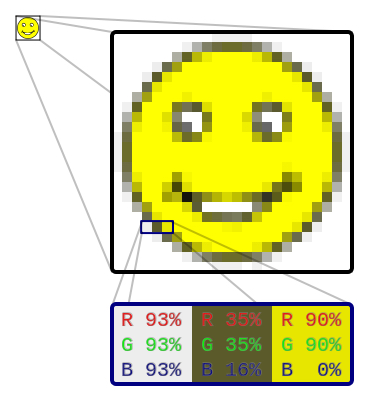

In [97]:
print(image_object)
display(image_object)

#### What does image data actually look like?
Recall, jpgs are just matricies pixes, which record the intensities of three colors: Red Green and Blue. This is encoded with a python image object as a three dimensional array, i.e., a matrix of triplicate numbers. This image is of size 368 x 400, so we can access pixels in x and y dimensions with indices up to those numbers! (Note: Our image object is only a generator, so the pixels are not actually retrieved unless they are loaded.)

In [98]:
px = image_object.load()
print(px[0,0])
print(px[183,199])
print(px[183,100])

(255, 255, 255)
(20, 20, 12)
(241, 240, 0)


To change a pixel to black, all we have to do is zero-out each of the bytes. To change a pixel to white, all we have to do is 255 (recall: there are 256 ways to arrange a single byte). We can do these operations for a bunch of pixes by double looping. (Note: When we alter the pixels, the changes take effect in the image object.)

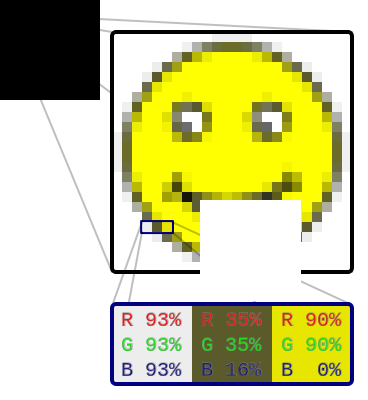

In [99]:
for i in range(100):
    for j in range(100):
        px[i,j] = (0,0,0)
        
for i in range(200,301):
    for j in range(200,301):
        px[i,j] = (255,255,255)
display(image_object)

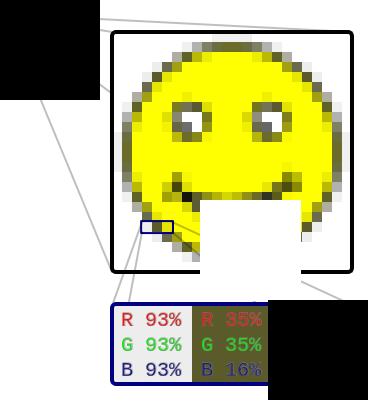

In [100]:
for i in range(268,368):
    for j in range(300,400):
        px[i,j] = (0,0,0)
display(image_object)

All you have to do is change the RBG intensities to make a variety of colors.

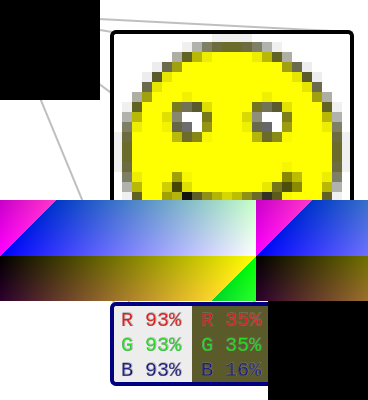

In [101]:
for i in range(0,368):
    for j in range(200,301):
        px[i,j] = ((i + j) % 256,i % 256,j % 256)
display(image_object)

#### What about features here?
Features in images take on physical meanings, perhaps related to how we recognize things. So, for faces this might be the distances between eyes. However this means figuring out where the eyes are first.

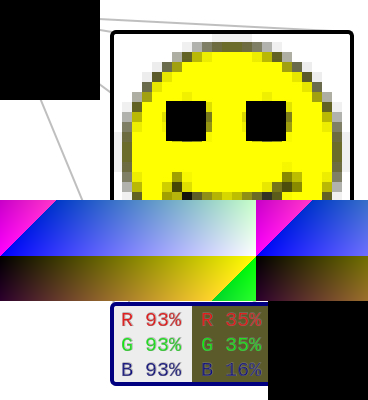

In [103]:
for i in range(166,206):
    for j in range(101,141):
        px[i,j] = px[i,j] = (0,0,0)
        
for i in range(246,286):
    for j in range(101,141):
        px[i,j] = px[i,j] = (0,0,0)
display(image_object)

So, it looks like the eyes here are about 80 pixels apart. The measurement of this feature might discern our smile from other smiles whose eyes are wider apart. For fun, let's reload the data (since we kind of wrecked it) and give our smile some crazy eyes!

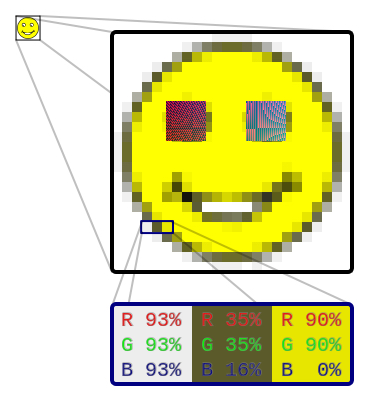

In [104]:
with open(file_path_img, 'rb') as inf:
    jpgdata = inf.read()
image_object = Image.open(BytesIO(jpgdata))
px = image_object.load()

for i in range(166,206):
    for j in range(101,141):
        px[i,j] = ((i * j) % 256,(i + j) % 256,(i - j) % 256)
        
for i in range(246,286):
    for j in range(101,141):
        px[i,j] = ((i * j) % 256,(i + j) % 256,(i - j) % 256)
display(image_object)

### XML
The Extended Markup Language (XML) format is a verbose type of associative data. It uses nested tags: <\key> ...value... </\key>. To associate values to keys. Here, we've got a restaurant menu in XML format.

In [105]:
file_path_xml = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\simple.xml'

In [106]:
with open(file_path_xml, "r") as f:
    menu = f.read()
print(menu)

<?xml version="1.0" encoding="UTF-8"?>
<breakfast_menu>
  <food>
    <name>Belgian Waffles</name>
    <price>$5.95</price>
    <description>Two of our famous Belgian Waffles with plenty of real maple syrup</description>
    <calories>650</calories>
  </food>
  <food>
    <name>Strawberry Belgian Waffles</name>
    <price>$7.95</price>
    <description>Light Belgian waffles covered with strawberries and whipped cream</description>
    <calories>900</calories>
  </food>
  <food>
    <name>Berry-Berry Belgian Waffles</name>
    <price>$8.95</price>
    <description>Light Belgian waffles covered with an assortment of fresh berries and whipped cream</description>
    <calories>900</calories>
  </food>
  <food>
    <name>French Toast</name>
    <price>$4.50</price>
    <description>Thick slices made from our homemade sourdough bread</description>
    <calories>600</calories>
  </food>
  <food>
    <name>Homestyle Breakfast</name>
    <price>$6.95</price>
    <description>Two eggs, bacon or s

To get the keys and values out of the XML we will need to parse it. We could spend a long time cooking up our own regular expressions for this, but people have already done this quite well, and packed it into the BeautifulSoup module.

In [109]:
soup = BeautifulSoup(menu, 'lxml')
print(soup.find('food'))

<food>
<name>Belgian Waffles</name>
<price>$5.95</price>
<description>Two of our famous Belgian Waffles with plenty of real maple syrup</description>
<calories>650</calories>
</food>


It looks like the schema has each food with a name, price, description and calories. Let's code this into a nice python dict object so we could navigate it more easily.

In [111]:
ourmenu = {}
for food in soup.find_all('food'):
    ourmenu[food.find("name").text] = {
        "name": food.find("name").text,
        "price": float(re.sub("\$","",food.find("price").text)),
        "description": food.find("description").text,
        "calories": int(food.find("calories").text)
    }
print("Here's what we've got not for Belgian Waffles:\n\n")
print(ourmenu)

Here's what we've got not for Belgian Waffles:


{'Belgian Waffles': {'name': 'Belgian Waffles', 'price': 5.95, 'description': 'Two of our famous Belgian Waffles with plenty of real maple syrup', 'calories': 650}, 'Strawberry Belgian Waffles': {'name': 'Strawberry Belgian Waffles', 'price': 7.95, 'description': 'Light Belgian waffles covered with strawberries and whipped cream', 'calories': 900}, 'Berry-Berry Belgian Waffles': {'name': 'Berry-Berry Belgian Waffles', 'price': 8.95, 'description': 'Light Belgian waffles covered with an assortment of fresh berries and whipped cream', 'calories': 900}, 'French Toast': {'name': 'French Toast', 'price': 4.5, 'description': 'Thick slices made from our homemade sourdough bread', 'calories': 600}, 'Homestyle Breakfast': {'name': 'Homestyle Breakfast', 'price': 6.95, 'description': 'Two eggs, bacon or sausage, toast, and our ever-popular hash browns', 'calories': 950}}


Since we've converted the prices and calories to floats and ints, respectively, we can now measure some totals for a given mean. For example, let's order a Homestyle Breakfast with a side of French Toast and check the damage.

In [112]:
price = 0.
calories = 0
for name in ["Homestyle Breakfast","French Toast"]:
    print("Name: "+name)
    print("Calories: "+str(ourmenu[name]["calories"]))
    print("Price: $"+str(ourmenu[name]["price"]))
    print("")
    price += ourmenu[name]["price"]
    calories += ourmenu[name]["calories"]
print("Total calories: "+str(calories))
print("Total price: $"+str(price))

Name: Homestyle Breakfast
Calories: 950
Price: $6.95

Name: French Toast
Calories: 600
Price: $4.5

Total calories: 1550
Total price: $11.45


### HTML
HTML is just XML with a specific schema for encoding webpages. So, we can use BeautifulSoup just the same here to get text content and hyperlinks, etcetera.

In [41]:
file_path_html = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\index.html'

In [42]:
with open(file_path_html, "r") as f:
    webpage = f.read()
print(webpage)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<!-- saved from url=(0205)https://alt-5a3199fc4282a.blackboard.com/bbcswebdav/pid-11684871-dt-content-rid-209812543_1/courses/32222.202135/index.html?one_hash=2567DC680B1C8590A2A7BF0AE6EDE63E&f_hash=D17101AFE089F4F92003D89216508C1C -->
<html><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
  
  <meta http-equiv="Content-Style-Type" content="text/css">
  <title></title>
  <meta name="Generator" content="Cocoa HTML Writer">
  <meta name="CocoaVersion" content="1504.82">
  <style type="text/css">
    body {background-color: #f0f0f2}
    p.p2 {margin: 0.0px 0.0px 12.0px 0.0px; line-height: 14.0px; font: 12.0px 'Helvetica Neue'; color: #000000; -webkit-text-stroke: #000000}
    p.p3 {margin: 0.0px 0.0px 12.0px 0.0px; line-height: 14.0px; font: 12.0px 'Helvetica Neue'; color: #38488f; -webkit-text-stroke: #38488f}
    span.s1 {font-kerning: none; background-color: #ffffff}
    

Usually, content text lives in <\p> tags in the <\body>, and hyperlinks live in <\a> tags.

In [43]:
websoup = BeautifulSoup(webpage, 'lxml')
print("Here are any body paragraphs:\n")
for paragraph in websoup.find_all("body"):
    print("Paragraph: "+paragraph.find('p').text)
    print("")
print("\n")
print("Here are any Hyperlink display texts and URLs:\n")
for hyperlink in websoup.find_all("a"):
    print("Hyperlink display text: "+hyperlink.text)
    print("Hyperlink URL: "+hyperlink["href"])

Here are any body paragraphs:

Paragraph: This domain is established to be used for illustrative examples in documents. You may use this domain in examples without prior coordination or asking for permission.



Here are any Hyperlink display texts and URLs:

Hyperlink display text: More information...
Hyperlink URL: http://www.iana.org/domains/example


### JSON
JSON is probably the favorite associative array data type for most data scientists. In Python, it's very easy to load, and for its similarity to the Python dict object type can generally be navigated as such. Here, our json file is an example from YouTube's API.

In [113]:
file_path_json = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\youtube.json'

In [114]:
with open(file_path_json, "r") as f:
    video = json.loads(f.read())
    
    
print("The data is actually one level into the schema:\n")
print(video.keys())
print("")
print("Here are the keys for the data on this video:\n")
print(video["data"].keys())

The data is actually one level into the schema:

dict_keys(['apiVersion', 'data'])

Here are the keys for the data on this video:

dict_keys(['updated', 'totalItems', 'startIndex', 'itemsPerPage', 'items'])


Within a list, the individual items are a good place to start exploring. Let's look at the first (only) item. Note That the values that we are printing out must be converted to strings. This is actually awesome, because it means that the json format implicitly encodes the object types, even in a text serialization (unlike XML). This is a real advantage for convenience in working with data&mdash;you don't necessarily have to cast types!

In [46]:
for key in video["data"]["items"][0]:
    print(key+": "+str(video["data"]["items"][0][key]))

id: hYB0mn5zh2c
uploaded: 2007-06-05T22:07:03.000Z
updated: 2010-01-07T13:26:50.000Z
uploader: GoogleDeveloperDay
category: News
title: Google Developers Day US - Maps API Introduction
description: Google Maps API Introduction ...
tags: ['GDD07', 'GDD07US', 'Maps']
thumbnail: {'default': 'http://i.ytimg.com/vi/hYB0mn5zh2c/default.jpg', 'hqDefault': 'http://i.ytimg.com/vi/hYB0mn5zh2c/hqdefault.jpg'}
player: {'default': 'http://www.youtube.com/watch?vu003dhYB0mn5zh2c'}
content: {'1': 'rtsp://v5.cache3.c.youtube.com/CiILENy.../0/0/0/video.3gp', '5': 'http://www.youtube.com/v/hYB0mn5zh2c?f...', '6': 'rtsp://v1.cache1.c.youtube.com/CiILENy.../0/0/0/video.3gp'}
duration: 2840
aspectRatio: widescreen
rating: 4.63
ratingCount: 68
viewCount: 220101
favoriteCount: 201
commentCount: 22
status: {'value': 'restricted', 'reason': 'limitedSyndication'}
accessControl: {'syndicate': 'allowed', 'commentVote': 'allowed', 'rate': 'allowed', 'list': 'allowed', 'comment': 'allowed', 'embed': 'allowed', 'vid

Creating your own json files is also quite easy because of the dict-json parallel. Let's take our converted restaurant menu and write out to a json file.

In [47]:
file_path_json2 = r'C:\Users\sharm\Desktop\Drexel\Class-work-\Spring 21-22\INFO 103 - TA\W2\simple.json'

In [48]:
with open(file_path_json2, "w+") as f:
    f.write(json.dumps(ourmenu))

The really cool thing about writing out the menu to json format (as we did) is that the json (unlike XML) format will carry forward the object tupes in the file. So, just as our YouTube data came in as ints and floats, the type changes that we made to the menu will be preserved in the output format!